<a href="https://colab.research.google.com/github/ELHAIRECH/USA-House-Price-prediction/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [61]:
data_df=pd.read_csv("kc_house_data.csv")


In [148]:
data_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [149]:
data_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [11]:
%matplotlib inline

In [64]:
data_df.shape

(21613, 21)

In [150]:
data_df1=data_df.drop(['sqft_lot','condition','yr_built','zipcode','long','sqft_lot15'],axis='columns')

In [78]:
data_df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [151]:
data_df1=data_df1.drop(['id','date'],axis='columns') 

In [152]:
data_df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
lat              0
sqft_living15    0
dtype: int64

In [153]:
data_df1.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [83]:
data_df1.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


In [154]:
df=data_df1.copy()

In [155]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410


In [156]:
df['price_per_sqrft']=df['price']/df['sqft_living']

In [97]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price_per_sqrft
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,188.050847
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,209.338521
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,233.766234
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,308.163265
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,303.571429


In [157]:
df1=pd.concat([df,data_df['zipcode']],axis='columns')

In [158]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price_per_sqrft,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,188.050847,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,209.338521,98125
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,233.766234,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,308.163265,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,303.571429,98074


In [159]:
df1.groupby('zipcode')['zipcode'].agg("count").sort_values(ascending=False)

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [160]:
len(df1.zipcode.unique())

70

# **OUTLIERS**

In [106]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price_per_sqrft,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,188.050847,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,209.338521,98125
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,233.766234,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,308.163265,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,303.571429,98074


In [161]:
df1[df1['sqft_living']/df1.bedrooms<300].head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price_per_sqrft,zipcode
97,199000.0,4,1.5,1160,1.0,0,0,7,1160,0,0,47.3036,1160,171.551724,98023
200,210000.0,3,1.0,860,1.0,0,0,6,860,0,0,47.5093,1300,244.186047,98056
319,268750.0,4,1.0,800,1.0,0,0,6,800,0,0,47.4800,1310,335.937500,98166
345,165000.0,4,1.0,1000,1.0,0,0,6,1000,0,0,47.4897,1020,165.000000,98178
346,239900.0,4,1.0,1000,1.0,0,0,6,1000,0,0,47.4897,1020,239.900000,98178


In [162]:
df2=df1[df1['sqft_living']/df1.bedrooms>=300]
df2.shape

(21402, 15)

In [163]:
df2.price_per_sqrft.describe()

count    21402.000000
mean       263.828389
std        109.876201
min         87.588235
25%        182.076835
50%        244.444444
75%        317.930856
max        810.138889
Name: price_per_sqrft, dtype: float64

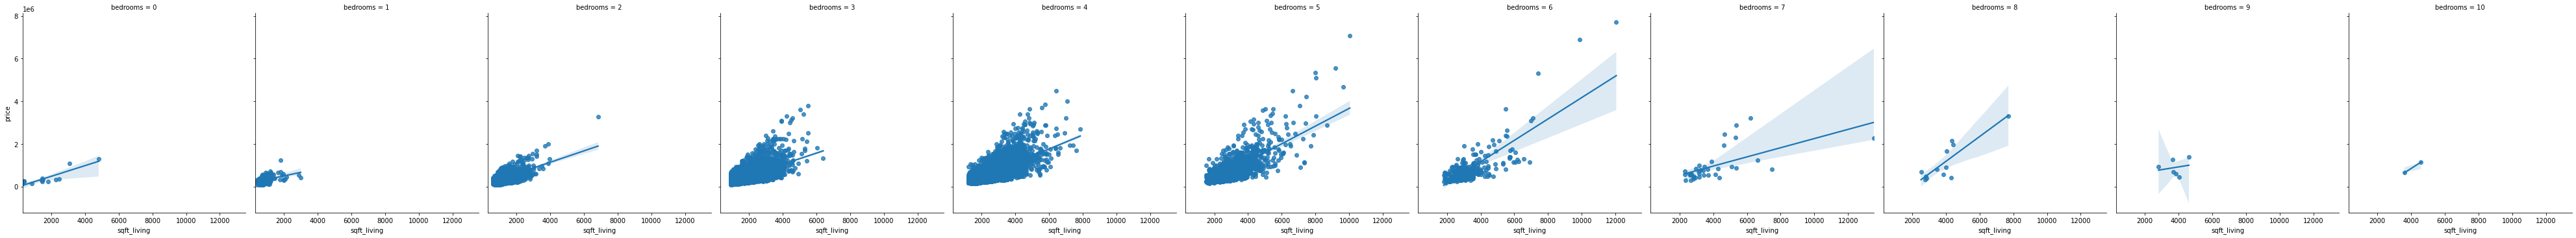

In [164]:
sns.lmplot(data=df2,x='sqft_living',y='price',col='bedrooms')

In [126]:
df2.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

(array([7.900e+01, 5.139e+03, 6.997e+03, 7.311e+03, 1.475e+03, 3.370e+02,
        4.400e+01, 1.200e+01, 4.000e+00, 4.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

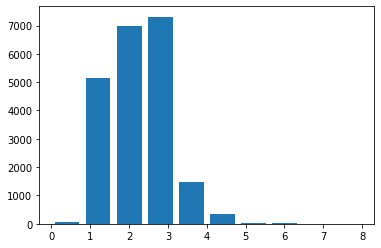

In [165]:
plt.hist(df2.bathrooms,rwidth=0.8)


In [166]:
df2[df2.bathrooms>df2.bedrooms+2]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,price_per_sqrft,zipcode
8477,339950.0,0,2.5,2290,2.0,0,0,8,2290,0,0,47.3473,2500,148.449782,98042
8484,240000.0,0,2.5,1810,2.0,0,0,7,1810,0,0,47.3493,1810,132.596685,98038
12653,320000.0,0,2.5,1490,2.0,0,0,7,1490,0,0,47.5261,1500,214.765101,98065


In [167]:
df3=df2[df2.bathrooms<df2.bedrooms+2]
df3.shape

(21398, 15)

In [168]:
df4=df3.drop('price_per_sqrft',axis='columns')

In [169]:
df4.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,98125
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,98074


In [170]:
dummies=pd.get_dummies(df4.zipcode)
dummies.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
df4.groupby('zipcode')['zipcode'].agg("count").sort_values(ascending=False)

zipcode
98103    597
98038    588
98115    578
98052    573
98117    548
        ... 
98102    104
98010     98
98024     79
98148     56
98039     50
Name: zipcode, Length: 70, dtype: int64

In [175]:
df5=pd.concat([df4,dummies.drop(98039,axis='columns')],axis='columns')
df5.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,zipcode,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98040,98042,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,98178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,98125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,98028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,98136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,98074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [176]:
df6=df5.drop('zipcode',axis='columns')

In [177]:
df6.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98040,98042,98045,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
x=df6.drop('price',axis='columns')
y=df6.price


In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,ytest=train_test_split(x,y,test_size=0.2,random_state=10)



In [184]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,ytest)

0.7997985736564018

# **K fold cross validaton**

In [185]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.80511759, 0.80759047, 0.81487889, 0.80380992, 0.79779285])

# **GRIDSEARCH**


In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222679821164211.16, tolerance: 231188459642.91467
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221781375223286.16, tolerance: 229417077904.30612
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227735214743472.22, tolerance: 233731425249.8456
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2217980

,model,best_score,best_params
0,linear_regression,0.805838,{'normalize': False}
1,lasso,0.805676,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.697978,"{'criterion': 'mse', 'splitter': 'random'}"
